In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The difference between new and old is that 
old one for nunez dataset hasn't exclude distance to tss thats greater than 5kb
In old: There are 880 rows distance to tss thats greater than 5kb
In new: there are none


In [2]:
inpath = '../Data/CleanedExternalData/'

NewDatasetCombine = pd.read_csv(inpath + 'DatasetCombineCleaned_v3.csv', low_memory=False)
NewDatasetCombine['orginal phenotype'] = NewDatasetCombine['Phenotype scores-ave_Rep1_Rep2'].combine_first(NewDatasetCombine['z_scored_avg_lfc']).combine_first(NewDatasetCombine['rhoSignChangedAndAvged'])
NewDatasetCombine

,Target Gene Symbol,chromosome,sgRNA Sequence,sgRNA Context Sequence,sgRNA 'Cut' Position,Strand of Target,TSS Position,sgRNA 'Cut' Site TSS Offset,Phenotype scores-ave_Rep1_Rep2,Avg_LFC-Tfinal,z-score relative to NC,condition,Domain,DataSet,rhoSignChangedAndAvged,zscoreRelativeNC_signed,Avg_LFC_signed,z_scored_avg_lfc,orginal phenotype
0,ACTR6,chr12,GCGAGCACATAGAGGGATCT,TGCTTCGAGCACATAGAGGGATCTGGGCCC,100198288.0,+,100200816.0,-2528.0,-0.018881,0.035104,-0.889828,K562,Kox1,Nunez,NaN,NaN,NaN,NaN,-0.018881
1,ACTR6,chr12,GTCGAGCACATAGAGGGATC,CTGCTTCGAGCACATAGAGGGATCTGGGCC,100198289.0,+,100200816.0,-2527.0,0.009292,0.295731,0.580559,K562,Kox1,Nunez,NaN,NaN,NaN,NaN,0.009292
2,ACTR6,chr12,GCCTGCTTCGAGCACATAGA,GTCCACCTGCTTCGAGCACATAGAGGGATC,100198295.0,+,100200816.0,-2521.0,0.000734,0.214023,0.119582,K562,Kox1,Nunez,NaN,NaN,NaN,NaN,0.000734
3,ACTR6,chr12,GACCTGCTTCGAGCACATAG,GGTCCACCTGCTTCGAGCACATAGAGGGAT,100198296.0,+,100200816.0,-2520.0,-0.008256,0.131427,-0.346402,K562,Kox1,Nunez,NaN,NaN,NaN,NaN,-0.008256
4,ACTR6,chr12,GAGACTCTGTCACCTCCGAG,GGGCTAGACTCTGTCACCTCCGAGGGGTCC,100198321.0,+,100200816.0,-2495.0,0.001314,0.165469,-0.154343,K562,Kox1,Nunez,NaN,NaN,NaN,NaN,0.001314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431090,HMX1,chr4,GGGCGCGGGGAGGGTGGGTC,GTGAGGGCGCGGGGAGGGTGGGTCAGGCGG,8871196.0,-,8871839.0,644.0,NaN,NaN,NaN,HCT116,Zim3,InHouse,NaN,NaN,NaN,-0.721298,-0.721298
431091,SNUPN,chr15,GGGCGGGGCCTGGGGCGGGT,GCGTGGGCGGGGCCTGGGGCGGGTCGGACT,75625191.0,-,75625725.0,535.0,NaN,NaN,NaN,HCT116,Zim3,InHouse,NaN,NaN,NaN,-1.293837,-1.293837
431092,SNUPN,chr15,GGTGGAGCGTGGGCGGGGCC,GGAGGGTGGAGCGTGGGCGGGGCCTGGGGC,75625201.0,-,75625725.0,525.0,NaN,NaN,NaN,HCT116,Zim3,InHouse,NaN,NaN,NaN,-1.423518,-1.423518
431093,NKX2-2,chr20,TCCCCCCTCCCCCGCCCGCC,CAACTCCCCCCTCCCCCGCCCGCCGGGGCA,21513745.0,-,21514064.0,320.0,NaN,NaN,NaN,HCT116,Zim3,InHouse,NaN,NaN,NaN,-1.040580,-1.040580


In [3]:
NewDatasetCombine['cellDomainDataSet'] = NewDatasetCombine[['condition', 'Domain', 'DataSet']].apply(
    lambda x: "_".join(x.astype(str)), axis=1)

In [4]:
NewDatasetCombine['cellDomainDataSet'].value_counts()

HCT116_Kox1_InHouse    86047
A549_Zim3_InHouse      86026
A549_Kox1_InHouse      85993
HCT116_Zim3_InHouse    85945
K562_Kox1_Nunez        68575
K562_Kox1_Gilbert      18509
Name: cellDomainDataSet, dtype: int64

42570
42609
42544
42609


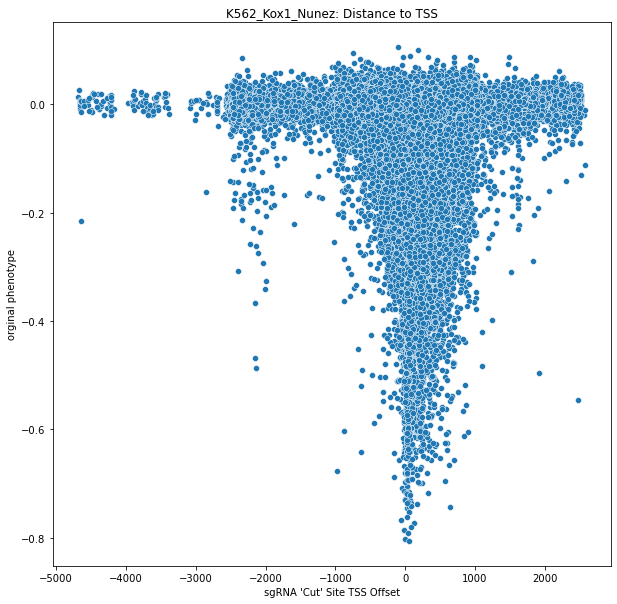

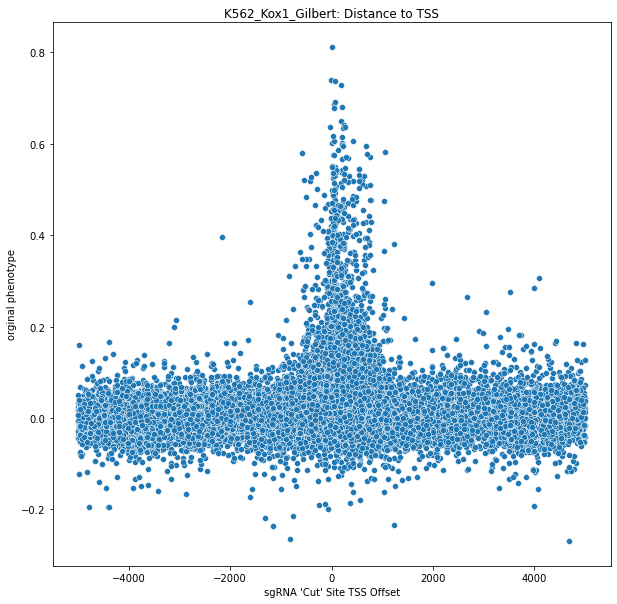

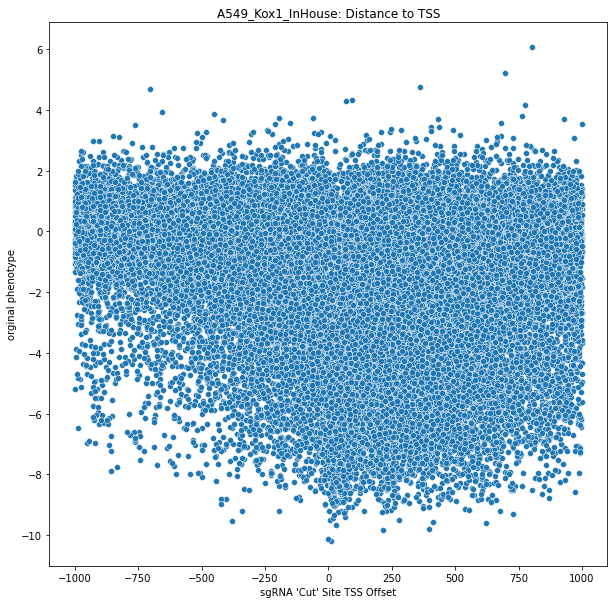

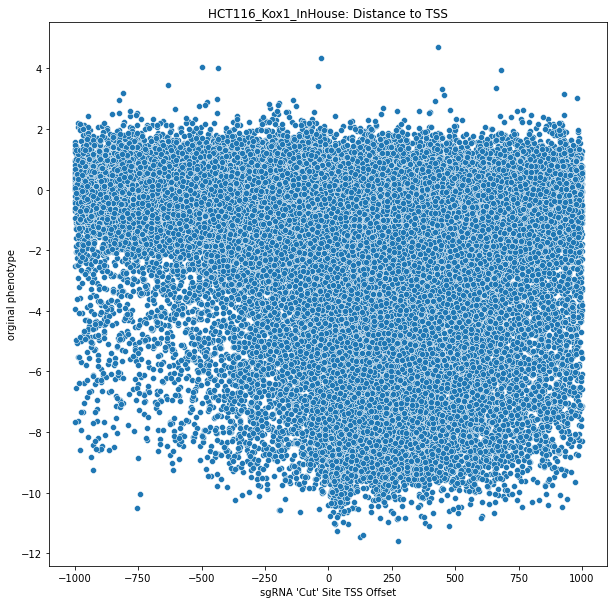

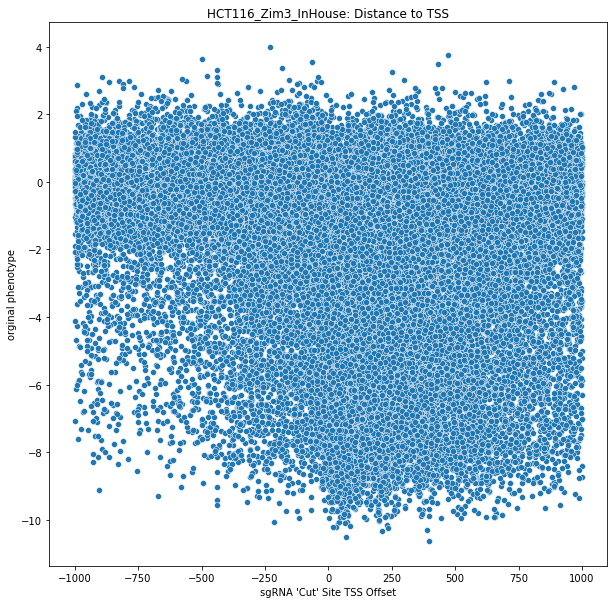

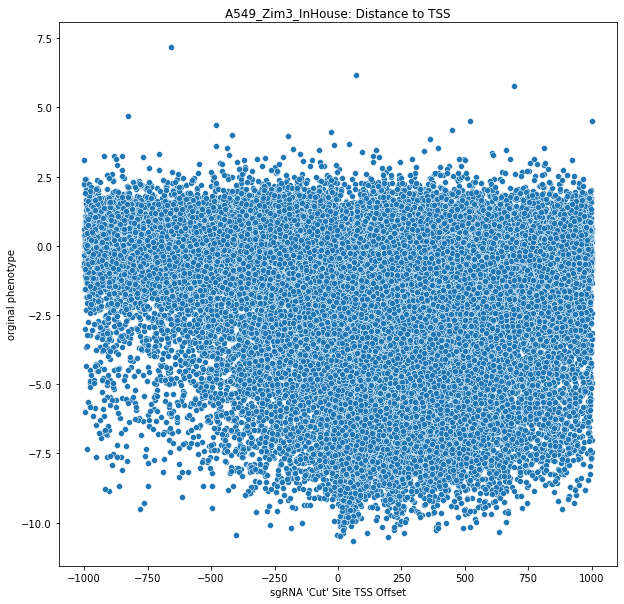

In [5]:
ess_noness = pd.read_csv('../Data/PrimaryLibrary/design/essentials_nonessentials_CRISPRi_tiling_designs_v2.csv')
EssGene = ess_noness[ess_noness.Category == 'Essential']['Target Gene Symbol'].unique()

for unique_set in NewDatasetCombine['cellDomainDataSet'].unique():
    SubsetNewDatasetCombine = NewDatasetCombine[NewDatasetCombine['cellDomainDataSet']== unique_set]
    if 'InHouse' in unique_set:
        SubsetNewDatasetCombine = SubsetNewDatasetCombine[SubsetNewDatasetCombine['Target Gene Symbol'].\
                                                                  isin(EssGene)]
        print(len(SubsetNewDatasetCombine))

    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=SubsetNewDatasetCombine, x='sgRNA \'Cut\' Site TSS Offset', y='orginal phenotype')
    plt.xlabel('sgRNA \'Cut\' Site TSS Offset')
    plt.ylabel('orginal phenotype')
    plt.title(unique_set + ': Distance to TSS')


In [6]:
# Create intervals of 25 between -225 and 225
interval_25 = list(range(-225, 250, 25))

# Create intervals to ensure -1000 falls into [-1000, -250)
interval_100_lower_5kb = [-2500, -1750, -1000]
interval_100_upper_5kb = list(range(250, 2501, 750))

interval_100_lower_1kb = [-1000,  -250]
interval_100_upper_1kb = [250,  1000]

# Combine all intervals with boundaries for extremes
cut_list_5kb = [-5000] + interval_100_lower_5kb + interval_25 + interval_100_upper_5kb + [5000]
cut_list_1kb = interval_100_lower_1kb +  interval_25 + interval_100_upper_1kb

# Create labels based on the new cut_list
labels_5kb = [f'[{cut_list_5kb[i]}, {cut_list_5kb[i+1]})' for i in range(len(cut_list_5kb)-1)]
labels_1kb = [f'[{cut_list_1kb[i]}, {cut_list_1kb[i+1]})' for i in range(len(cut_list_1kb)-1)]

print("cut_list:", cut_list_5kb)
print("labels:", labels_5kb)
# print("cut_list:", cut_list_1kb)
# print("labels:", labels_1kb)

cut_list: [-5000, -2500, -1750, -1000, -225, -200, -175, -150, -125, -100, -75, -50, -25, 0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 1000, 1750, 2500, 5000]
labels: ['[-5000, -2500)', '[-2500, -1750)', '[-1750, -1000)', '[-1000, -225)', '[-225, -200)', '[-200, -175)', '[-175, -150)', '[-150, -125)', '[-125, -100)', '[-100, -75)', '[-75, -50)', '[-50, -25)', '[-25, 0)', '[0, 25)', '[25, 50)', '[50, 75)', '[75, 100)', '[100, 125)', '[125, 150)', '[150, 175)', '[175, 200)', '[200, 225)', '[225, 250)', '[250, 1000)', '[1000, 1750)', '[1750, 2500)', '[2500, 5000)']


In [7]:
# Categorize values into intervals with right=False except the last one
import numpy as np

NewDatasetCombine['TSS Bucket (-5kb to 5kb)'] = pd.cut(NewDatasetCombine['sgRNA \'Cut\' Site TSS Offset'], 
                                         cut_list_5kb[:-1], labels=labels_5kb[:-1], right=False)
NewDatasetCombine['TSS Bucket (-5kb to 5kb)'] = np.where(
    NewDatasetCombine['sgRNA \'Cut\' Site TSS Offset'] >= cut_list_5kb[-2],
    pd.cut(NewDatasetCombine['sgRNA \'Cut\' Site TSS Offset'], bins=cut_list_5kb[-2:], labels=[labels_5kb[-1]], right=True),
    NewDatasetCombine['TSS Bucket (-5kb to 5kb)']
)

In [8]:
NewDatasetCombine['TSS Bucket (-1kb to 1kb)'] = pd.cut(NewDatasetCombine['sgRNA \'Cut\' Site TSS Offset'], 
                                         cut_list_1kb[:-1], labels=labels_1kb[:-1], right=False)
NewDatasetCombine['TSS Bucket (-1kb to 1kb)'] = np.where(
    NewDatasetCombine['sgRNA \'Cut\' Site TSS Offset'] >= cut_list_1kb[-2],
    pd.cut(NewDatasetCombine['sgRNA \'Cut\' Site TSS Offset'], bins=cut_list_1kb[-2:], labels=[labels_1kb[-1]], right=True),
    NewDatasetCombine['TSS Bucket (-1kb to 1kb)']
)

In [9]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

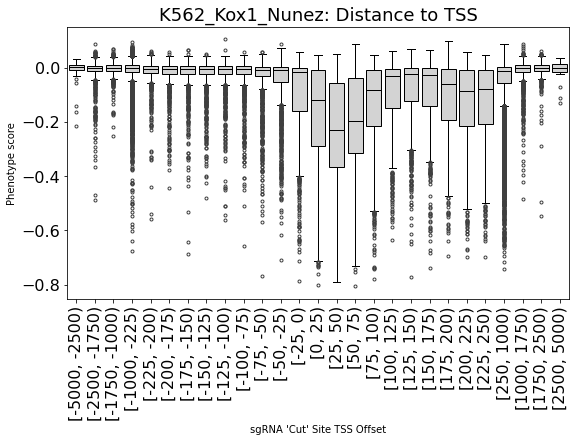

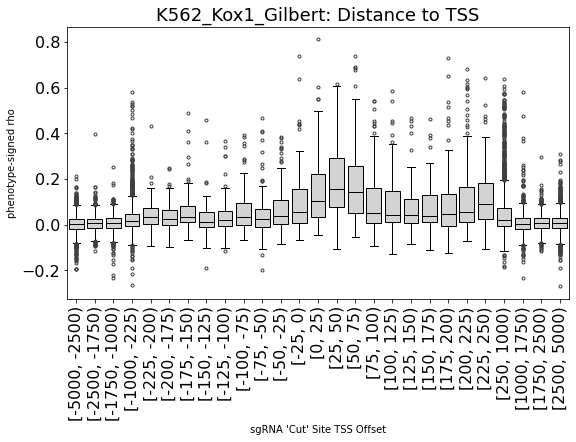

In [10]:
graph_pathout = '../Figure/Figure 3/Individual Figures/'
for unique_set in ['K562_Kox1_Nunez', 'K562_Kox1_Gilbert']: #NewDatasetCombine['cellDomainDataSet'].unique():
    SubsetNewDatasetCombine = NewDatasetCombine[NewDatasetCombine['cellDomainDataSet']== unique_set]
    if 'InHouse' in unique_set:
        SubsetNewDatasetCombine = SubsetNewDatasetCombine[SubsetNewDatasetCombine['Target Gene Symbol'].\
                                                                  isin(EssGene)]
        print(len(SubsetNewDatasetCombine))

    plt.figure(figsize=(9, 5))
    ax = sns.boxplot(data=SubsetNewDatasetCombine, x='TSS Bucket (-5kb to 5kb)', 
                y='orginal phenotype',  boxprops=dict(facecolor='lightgrey', edgecolor='black'),
                 whiskerprops=dict(color='black'),  # Whisker line color
                 capprops=dict(color='black'),  # Cap line color
                 medianprops=dict(color='black'), 
    flierprops={"marker": "."}, order = labels_5kb)
    for line in ax.lines:
        line.set_linewidth(1)  # Set whisker, cap, and median line width (increase the value as needed)

    plt.xlabel('sgRNA \'Cut\' Site TSS Offset')
    if 'InHouse' in unique_set:
        plt.ylabel('z-score')
    elif 'Gilbert' in unique_set:
        plt.ylabel('phenotype-signed rho')
    elif 'Nunez' in unique_set:
        plt.ylabel('Phenotype score')#: lower the phenotype score -> the more active the guide '
    plt.title(unique_set + ': Distance to TSS',fontsize=18)
    plt.xticks(fontsize=16, rotation=90)
    plt.yticks(fontsize=16)
    plt.savefig(graph_pathout + unique_set+"_TSS_v3.pdf", dpi=300, bbox_inches='tight')




42609
42544
42609
42570


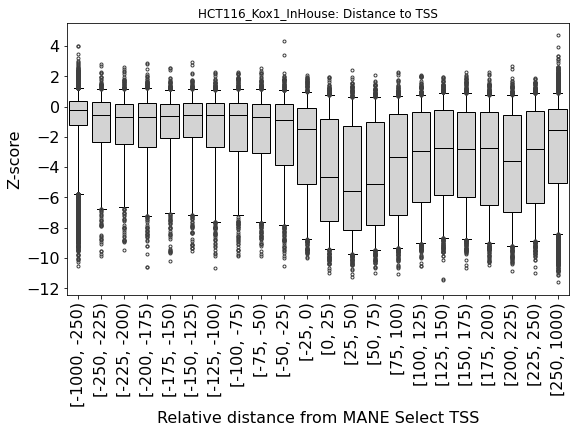

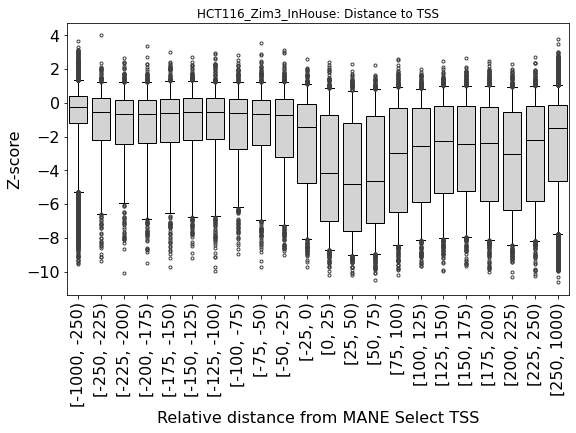

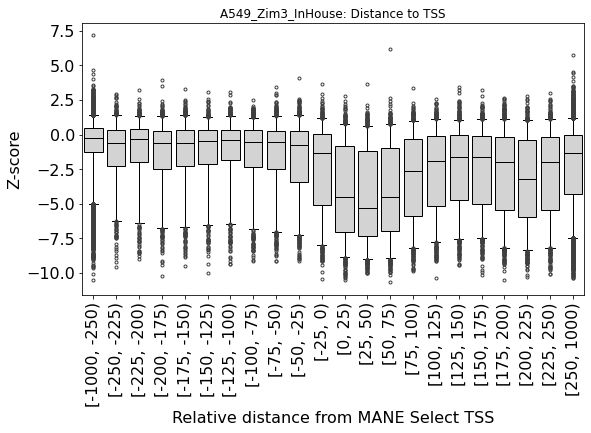

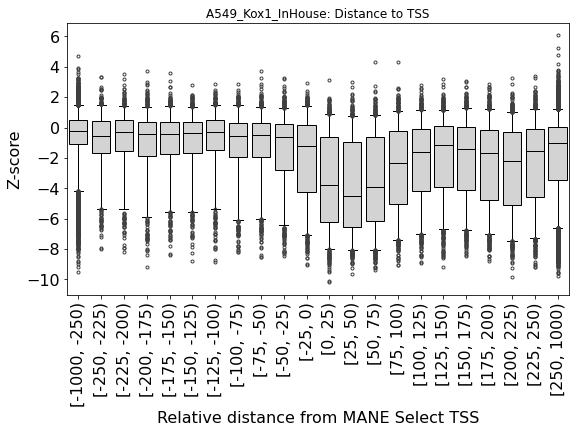

In [11]:
graph_pathout = '../Figure/Figure 3/Individual Figures/'
for unique_set in [
       'HCT116_Kox1_InHouse', 'HCT116_Zim3_InHouse', 'A549_Zim3_InHouse','A549_Kox1_InHouse']: #NewDatasetCombine['cellDomainDataSet'].unique():
    SubsetNewDatasetCombine = NewDatasetCombine[NewDatasetCombine['cellDomainDataSet']== unique_set]
    if 'InHouse' in unique_set:
        SubsetNewDatasetCombine = SubsetNewDatasetCombine[SubsetNewDatasetCombine['Target Gene Symbol'].\
                                                                  isin(EssGene)]
        print(len(SubsetNewDatasetCombine))

    plt.figure(figsize=(9, 5))
    sns.boxplot(data=SubsetNewDatasetCombine, x='TSS Bucket (-1kb to 1kb)', 
                y='orginal phenotype',  boxprops=dict(facecolor='lightgrey', edgecolor='black'),
                 whiskerprops=dict(color='black'),  # Whisker line color
                 capprops=dict(color='black'),  # Cap line color
                 medianprops=dict(color='black'), 
    flierprops={"marker": "."}, order = labels_1kb, whis = [5,95])
    for line in ax.lines:
        line.set_linewidth(2)  # Set whisker, cap, and median line width (increase the value as needed)

    plt.xlabel('sgRNA \'Cut\' Site TSS Offset')
    if 'InHouse' in unique_set:
        plt.ylabel('z-score')
    elif 'Gilbert' in unique_set:
        plt.ylabel('phenotype-signed rho')
    elif 'Nunze' in unique_set:
        plt.ylabel('Phenotype score: lower the phenotype score -> the more active the guide ')
    plt.title(unique_set + ': Distance to TSS')
    plt.xticks(fontsize=16, rotation=90)
    plt.yticks(fontsize=16)
    plt.ylabel('Z-score',fontsize=16)
    plt.xlabel('Relative distance from MANE Select TSS',fontsize=16)
    plt.savefig(graph_pathout + unique_set+"_TSS_v3.pdf", dpi=300, bbox_inches='tight')



In [12]:
SubsetNewDatasetCombine['TSS Bucket (-1kb to 1kb)'].value_counts()

[250, 1000)      16037
[-1000, -250)    11567
[175, 200)         908
[225, 250)         875
[150, 175)         839
[125, 150)         839
[75, 100)          813
[200, 225)         797
[100, 125)         781
[0, 25)            776
[50, 75)           768
[-50, -25)         766
[-75, -50)         766
[-100, -75)        740
[-125, -100)       732
[-25, 0)           709
[25, 50)           701
[-175, -150)       671
[-150, -125)       640
[-200, -175)       629
[-225, -200)       589
[-250, -225)       588
Name: TSS Bucket (-1kb to 1kb), dtype: int64

In [13]:
# Calculate the 95th and 5th percentiles

percentile_95 = np.percentile(SubsetNewDatasetCombine[SubsetNewDatasetCombine['TSS Bucket (-1kb to 1kb)'] == '[75, 100)']['orginal phenotype'], 95)
percentile_5 = np.percentile(SubsetNewDatasetCombine[SubsetNewDatasetCombine['TSS Bucket (-1kb to 1kb)'] == '[75, 100)']['orginal phenotype'], 5)



In [14]:
percentile_95

1.0901750094446627

In [15]:
percentile_5

-7.381844768166847